In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import data

In [3]:
df = pd.read_csv("BankChurners.csv")
# df[['Customer_Age', 'Total_Trans_Amt', 'Total_Trans_Ct']]

# Basic statics

## Customer_Age

In [25]:
print(df['Customer_Age'].describe())
print("range =", df['Customer_Age'].max() - df['Customer_Age'].min())
print("mode =", df['Customer_Age'].mode()[0])
print("varience =", df['Customer_Age'].std()**2)

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64
range = 47
mode = 44
varience = 64.26930723247501


## Total_Trans_Amt

In [26]:
print(df['Total_Trans_Amt'].describe())
print("range =", df['Total_Trans_Amt'].max() - df['Total_Trans_Amt'].min())
print("mode =", df['Total_Trans_Amt'].mode()[0])
print("varience =", df['Total_Trans_Amt'].std()**2)

count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64
range = 17974
mode = 4253
varience = 11540487.165373331


## Total_Trans_Ct

In [6]:
print(df['Total_Trans_Ct'].describe())
print("mode =", df['Total_Trans_Ct'].mode()[0])
print("s^2 =", df['Total_Trans_Ct'].std()**2)

count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64
mode = 81
s^2 = 550.9615634942061


# Histogram

Text(0, 0.5, 'Count')

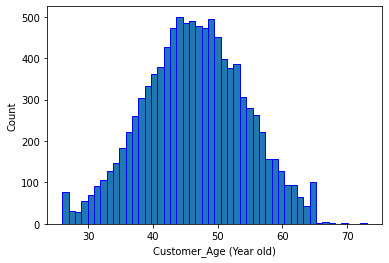

In [7]:
plot = plt.hist(df[['Customer_Age']], edgecolor = 'blue', bins=48)
plt.xlabel('Customer_Age (Year old)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

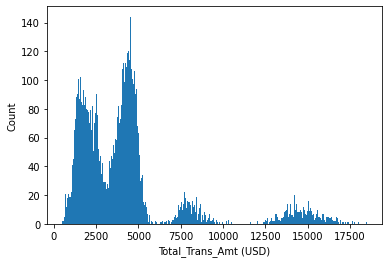

In [8]:
plot = plt.hist(df[['Total_Trans_Amt']], bins=500)
plt.xlabel('Total_Trans_Amt (USD)')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

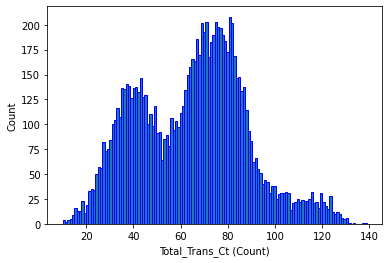

In [9]:
plt.hist(df['Total_Trans_Ct'], edgecolor = 'blue', bins=130)
plt.xlabel('Total_Trans_Ct (Count)')
plt.ylabel('Count')

# Scatter Plot

Text(0, 0.5, 'Total_Trans_Amt')

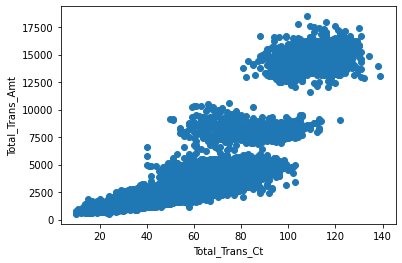

In [10]:
plt.scatter(df[['Total_Trans_Ct']],df[['Total_Trans_Amt']])
plt.xlabel('Total_Trans_Ct')
plt.ylabel('Total_Trans_Amt')

# Box Plot

[Text(0, 0.5, 'Year old')]

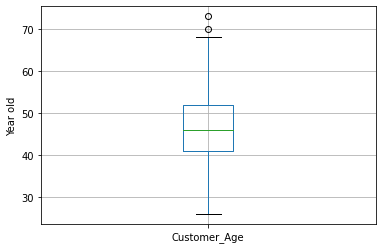

In [11]:
df.boxplot('Customer_Age').set(ylabel='Year old')

[Text(0, 0.5, 'Amount(USD)')]

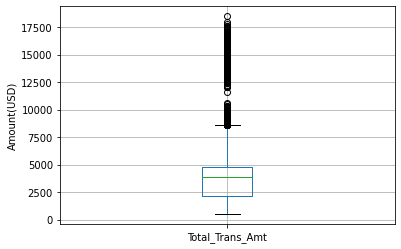

In [12]:
df.boxplot('Total_Trans_Amt').set(ylabel='Amount(USD)')

[Text(0, 0.5, 'Count')]

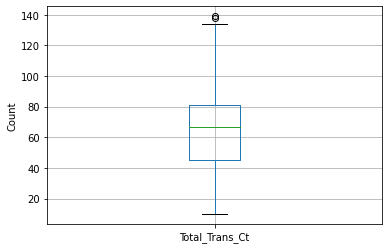

In [13]:
df.boxplot('Total_Trans_Ct').set(ylabel='Count')

## Clean Outliner

In [14]:
def fs(df):
    return df.quantile(q=0.75)-df.quantile(q=0.25)
def ub(df):
    return df.quantile(q=0.5)+(fs(df)*1.5)
def lb(df):
    return df.quantile(q=0.5)-(fs(df)*1.5)

In [15]:
df_clean = df[(df['Total_Trans_Amt'] <=  ub(df['Total_Trans_Amt'])) & (df['Total_Trans_Amt'] >= lb(df['Total_Trans_Amt']))]
df_clean = df_clean[(df['Customer_Age'] <= ub(df['Customer_Age'])) & (df['Customer_Age'] >= lb(df['Customer_Age']))]
df_clean = df_clean[(df['Total_Trans_Ct'] <=  ub(df['Total_Trans_Ct'])) & (df['Total_Trans_Ct'] >= lb(df['Total_Trans_Ct']))]

/var/folders/9y/rqqys4kj4mz3ffxmf29_lf240000gn/T/ipykernel_48957/3840212026.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(df['Customer_Age'] <= ub(df['Customer_Age'])) & (df['Customer_Age'] >= lb(df['Customer_Age']))]
/var/folders/9y/rqqys4kj4mz3ffxmf29_lf240000gn/T/ipykernel_48957/3840212026.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(df['Total_Trans_Ct'] <=  ub(df['Total_Trans_Ct'])) & (df['Total_Trans_Ct'] >= lb(df['Total_Trans_Ct']))]


[Text(0, 0.5, 'Year old')]

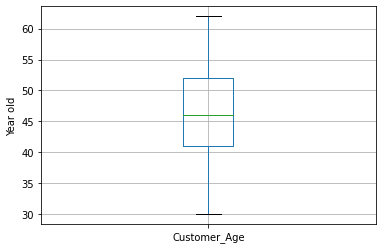

In [16]:
df_clean.boxplot('Customer_Age').set(ylabel='Year old')

[Text(0, 0.5, 'Amount(USD)')]

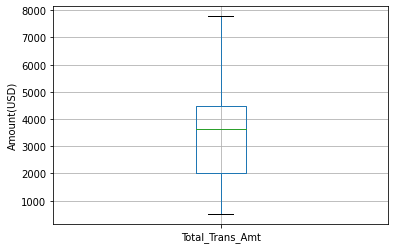

In [17]:
df_clean.boxplot('Total_Trans_Amt').set(ylabel='Amount(USD)')

[Text(0, 0.5, 'Count')]

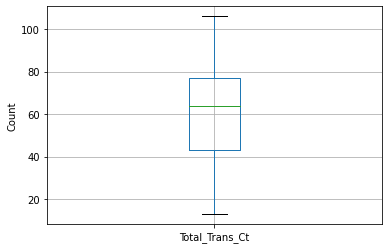

In [18]:
df_clean.boxplot('Total_Trans_Ct').set(ylabel='Count')

# Probability Density Function (Continuous)

Text(0.5, 0, 'Total_Trans_Amt')

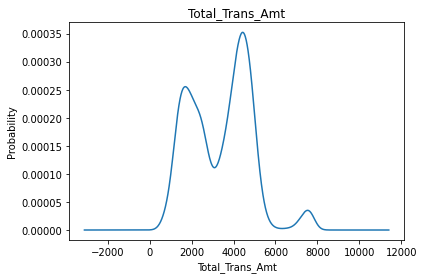

In [19]:
# plt.hist(df_clean['Total_Trans_Amt'], density=True)
df_clean['Total_Trans_Amt'].plot.kde(title='Total_Trans_Amt')
plt.ylabel('Probability')
plt.xlabel('Total_Trans_Amt')

# Probability Mass Function (Discrete)

Text(0.5, 0, 'Customer_Age (Year old)')

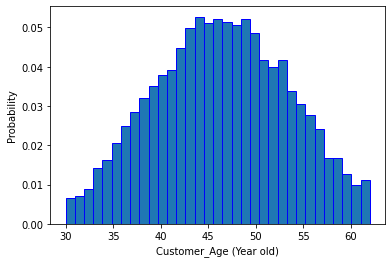

In [20]:
plt.hist(df_clean['Customer_Age'], density=True, edgecolor = 'blue', bins=33)
plt.ylabel('Probability')
plt.xlabel('Customer_Age (Year old)')

Text(0.5, 0, 'Total_Trans_Ct (Count)')

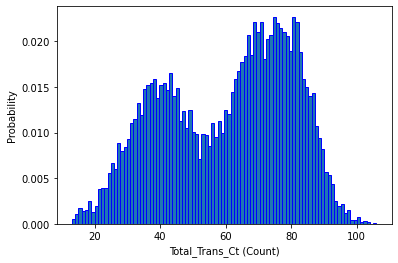

In [21]:
# plt.hist(df_clean['Total_Trans_Ct'], density=True)
# print(df_clean['Total_Trans_Ct'].max() - df_clean['Total_Trans_Ct'].min())
plt.hist(df_clean['Total_Trans_Ct'], density=True,edgecolor = 'blue', bins=94)
plt.ylabel('Probability')
plt.xlabel('Total_Trans_Ct (Count)')

# Cumulative Distribution Function

## Discrete

Text(0.5, 0, 'Customer_Age (Year old)')

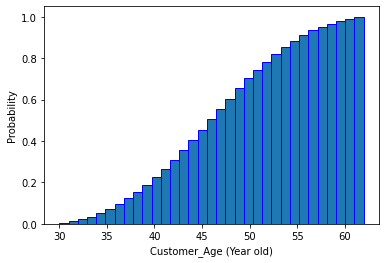

In [22]:
plt.hist(df_clean['Customer_Age'], density=True, cumulative=True,edgecolor = 'blue', bins=33)
plt.ylabel('Probability')
plt.xlabel('Customer_Age (Year old)')

Text(0.5, 0, 'Total_Trans_Ct (Count)')

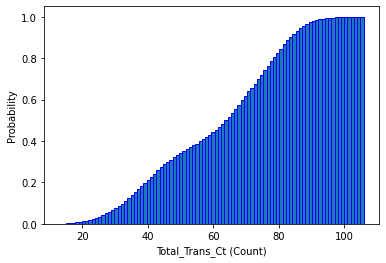

In [23]:
plot = plt.hist(df_clean['Total_Trans_Ct'],density=True, cumulative=True,edgecolor = 'blue', bins=94)
plt.ylabel('Probability')
plt.xlabel('Total_Trans_Ct (Count)')

## Continue

Text(0.5, 0, 'Total_Trans_Amt (USD)')

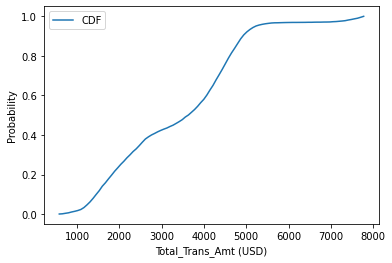

In [24]:
# getting data of the histogram
count, bins_count = np.histogram(df_clean['Total_Trans_Amt'].to_numpy() , bins=100)
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Total_Trans_Amt (USD)')